In [ ]:
# install all needed modules with provided requirements file

import os
running_local = True if os.getenv('JUPYTERHUB_USER') is None else False
    
if running_local:
    import sys
    !{sys.executable} -m pip install -r requirements_random.txt

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import gym
import numpy as np
import os

from tqdm import trange
import pandas as pd

%matplotlib inline

In [3]:
# Set a seed for reproducing results
random_seed = 1234
np.random.seed(random_seed)

In [4]:
class Random_Agent:
    """
    An agent that always takes random actions.
    """
    
    def __init__(self, env, num_episodes, num_steps):
        """
        Contructor
        """
        self.env = env
        self.num_episodes = num_episodes
        self.num_steps = num_steps
       
    def random_action(self):
        """
        Select a random action
        """
        return self.env.action_space.sample()
  
    def run(self):
        # Array to store cumulative rewards per episode
        episode_rewards = np.zeros((self.num_episodes, 1))
        # For each episode
        for episode in trange(self.num_episodes):
            # Cumulative reward
            episode_reward = 0
            # Initialize the environment and get the first state
            state = env.reset()
            # Set the done variable to False
            done = False
            # Variable for tracking the time
            t = 0
            # For each step of the episode
            while (not done):
                action = self.random_action()
                # Perform the action and observe the next_state and reward
                next_state, reward, done, _ = env.step(action)
                # Record history
                episode_reward += reward
                # Update the state
                state = next_state
                # Increment the timestep
                t += 1
                # Exit if the max number of steps has been exceeded
                if t>=self.num_steps:
                    done = True
            # Store the cumulative reward for this episode        
            episode_rewards[episode] = episode_reward
        return episode_rewards

In [5]:
# Initialize the environment
env = gym.make("Acrobot-v1")

# By default, the max steps for this environment is 200
# which is difficult for the simple algorithms we have used till now
# To make things easier, we increase the max steps per episode
env._max_episode_steps = 4000

# Set the same random seed in gym for reproducing results
env.seed(random_seed)

[1234]

In [6]:
random_agent = Random_Agent(env, num_episodes=200, num_steps=2000)
rewards = random_agent.run().flatten()

100%|██████████| 200/200 [01:32<00:00,  2.17it/s]


In [7]:
# print avg. reward of last 100 episodes
last_100 = rewards[-100:]
avg_last_100 = sum(last_100)/100
print('Average reward of last 100 episodes:', avg_last_100)

Average reward of last 100 episodes: -1611.08


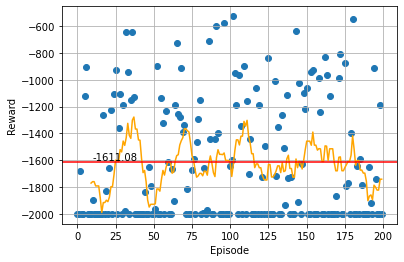

In [16]:
# Plot results
rewards_smoothed = pd.Series.rolling(pd.Series(rewards), 10).mean()
rewards_smoothed = [elem for elem in rewards_smoothed]
plt.scatter([i for i in range(len(rewards))], rewards)
plt.plot(rewards_smoothed, color='orange')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.axhline(y=avg_last_100, color='r', linestyle='-')
plt.text(10, avg_last_100+15, avg_last_100)
plt.grid(True)

plt.savefig("random.png", dpi=600)
plt.show()